# Exercicio

1. Considere o seguinte script:

In [ ]:
import turtle

def draw_bar(t, height):
    """ Get turtle t to draw one bar, of height. """
    t.left(90)
    t.forward(height)
    t.right(90)
    t.forward(40)
    t.right(90)
    t.forward(height)
    t.left(90)
    t.forward(10)
    #t.leftt(90)

tess = turtle.Turtle() #instanciação
jn = turtle.Screen()

tess.color("blue")
jn.bgcolor("white")
tess.penup() #levantar a caneta
tess.goto(-200,-150) #mudar posicao de inicio
tess.pendown() #abaixar a caneta

xs = [48,117,200,240,160,260,220]

for a in xs:
    draw_bar(tess, a)

1) Modifique-o para que o resultado seja um **histograma**, como o mostrado na figura abaixo.
Amplie seu script para que seja possível passar ao programa dados (frequência), com o valor do bin (classe de frequência) e cores determinados pelo usuário.


Adicione declarações condicionais à função para casos passíveis de gerar erros, como por exemplo, se alguma variável do argumento da função não for definida.

***Exemplo***: Generalize sua função para tomar como argumento uma lista que contenha as frequências do histograma e verifique que o argumento realmente é uma lista. Caso não seja, imprima uma mensagem de erro.

![](https://raw.githubusercontent.com/malbouis/Python_intro/master/aulas_2019/pics/histo.png)

2) Repita o exercício 1) usando **Manipulação de exceção em Python** (pesquisem!!!!), com as cláusulas ```try``` e ```except```.  <=== **A ser apresentado em sala de aula**.

2) **Desafio**: Faça um programa equivalente ao do item 1., utilizando ***matplotlib*** e ***numpy*** ao invés de ***turtle***

In [2]:
# 1

import turtle

def draw_bar(t, height, bar_width, fill_color):
    """
    Desenha uma única barra preenchida de um histograma.
    A tartaruga começa na base esquerda e termina na base direita da barra.
    """
    # Adicionando validação básica para os parâmetros numéricos
    if not isinstance(height, (int, float)) or height < 0:
        print(f"Erro: Altura inválida ({height}). Deve ser um número positivo aqui.")
        return

    t.color("black", fill_color) # Define a cor do traço e do preenchimento

    t.begin_fill()          # Inicia o preenchimento da forma
    t.left(90)              # Vira para cima
    t.forward(height)       # Desenha a altura da barra
    t.right(90)             # Vira para a direita (topo da barra)
    t.forward(bar_width)    # Desenha a largura da barra
    t.right(90)             # Vira para baixo
    t.forward(height)       # Desenha de volta para a base
    t.left(90)              # Retorna à orientação original (para a direita)
    t.end_fill()            # Finaliza o preenchimento

    # Move a tartaruga para a posição inicial da próxima barra
    t.forward(10) # Espaço entre as barras (pode ser ajustado)


def desenhar_histograma(frequencias, cor_barra="blue", largura_barra=40):
    """
    Função generalizada que desenha um histograma a partir de uma lista de frequências.
    Verifica se o argumento de entrada é uma lista.
    """
    # Validação da entrada: verifica se 'frequencias' é uma lista
    if not isinstance(frequencias, list):
        print(f"ERRO FATAL: O argumento passado não é uma lista. Tipo recebido: {type(frequencias)}")
        return

    # Configuração inicial da tartaruga e da tela
    tess = turtle.Turtle()
    jn = turtle.Screen()
    jn.bgcolor("white")
    tess.pensize(2)
    tess.speed(1) # Velocidade de desenho

    # Posiciona a tartaruga no canto inferior esquerdo
    tess.penup()
    tess.goto(-250, -150)
    tess.pendown()

    # Desenha um eixo X simples (opcional, para visualização da base)
    tess.forward(len(frequencias) * (largura_barra + 10))
    tess.backward(len(frequencias) * (largura_barra + 10))
    tess.left(90)
    tess.forward(300)
    tess.backward(300)
    tess.right(90)

    # Reposiciona para desenhar as barras
    tess.penup()
    tess.goto(-250, -150)
    tess.pendown()

    # Intera sobre os dados e desenha cada barra
    for a in frequencias:
        draw_bar(tess, a, largura_barra, cor_barra)

    # Mantém a janela aberta
    turtle.done()

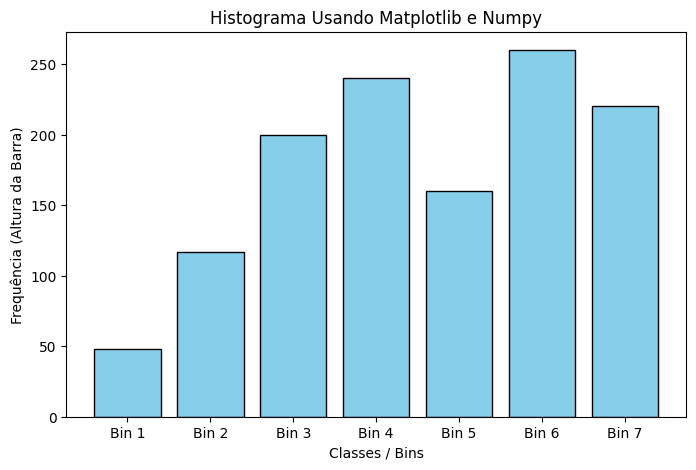

In [4]:
# 3

import matplotlib.pyplot as plt
import numpy as np

def plotar_histograma(frequencias, titulo="Histograma de Frequências", cor_barra='blue'):
    """
    Gera um histograma usando matplotlib a partir de uma lista de frequências.
    """
    # Validação da entrada
    if not isinstance(frequencias, list):
        print(f"ERRO: O argumento passado não é uma lista. Tipo recebido: {type(frequencias)}")
        return

    # Usando NumPy para criar um array de posições para as barras no eixo X
    # np.arange(len(frequencias)) cria [0, 1, 2, ...]
    posicoes_x = np.arange(len(frequencias))

    # Criando o gráfico
    plt.figure(figsize=(8, 5)) # Define o tamanho da figura

    # A função bar é o equivalente ao desenho da "barra" da tartaruga
    plt.bar(posicoes_x, frequencias, color=cor_barra, edgecolor='black', width=0.8)

    # Configurações adicionais para melhorar a visualização do histograma
    plt.xlabel("Classes / Bins")
    plt.ylabel("Frequência (Altura da Barra)")
    plt.title(titulo)

    # Define os marcadores do eixo X para ficarem no centro das barras
    plt.xticks(posicoes_x, [f'Bin {i+1}' for i in range(len(frequencias))])

    # Exibe o gráfico gerado
    plt.show()

#Exemplo

xs = [48, 117, 200, 240, 160, 260, 220]

#Executando o programa

plotar_histograma(
    frequencias=xs,
    titulo="Histograma Usando Matplotlib e Numpy",
    cor_barra='skyblue'
)